<a href="https://colab.research.google.com/github/manish-athith/Weather-Forecast/blob/main/Weather_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing the Libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#Loading the Dataset

In [4]:
df = pd.read_csv("/content/GlobalWeatherRepository.csv")
df.head()

,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,...,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,...,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,...,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,...,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,...,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,...,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [5]:
df.shape

(60413, 41)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60413 entries, 0 to 60412
Data columns (total 41 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   country                       60413 non-null  object 
 1   location_name                 60413 non-null  object 
 2   latitude                      60413 non-null  float64
 3   longitude                     60413 non-null  float64
 4   timezone                      60413 non-null  object 
 5   last_updated_epoch            60413 non-null  int64  
 6   last_updated                  60413 non-null  object 
 7   temperature_celsius           60413 non-null  float64
 8   temperature_fahrenheit        60413 non-null  float64
 9   condition_text                60413 non-null  object 
 10  wind_mph                      60413 non-null  float64
 11  wind_kph                      60413 non-null  float64
 12  wind_degree                   60413 non-null  int64  
 13  w

In [7]:
 df.isnull().sum()

,0
country,0
location_name,0
latitude,0
longitude,0
timezone,0
last_updated_epoch,0
last_updated,0
temperature_celsius,0
temperature_fahrenheit,0
condition_text,0


In [8]:
df1=df.copy()

I see there is no NULL VALUES in the dataset , so there is no need to handle Missing Values

# Data PreProcessing

In [9]:
# Convert 'last_updated' to datetime format
df['last_updated'] = pd.to_datetime(df['last_updated'])

In [10]:
# Handle Outliers using IQR Method
Q1_temp, Q3_temp = df['temperature_celsius'].quantile([0.25, 0.75])
IQR_temp = Q3_temp - Q1_temp
lower_bound_temp = Q1_temp - 1.5 * IQR_temp
upper_bound_temp = Q3_temp + 1.5 * IQR_temp

In [11]:

Q1_precip, Q3_precip = df['precip_mm'].quantile([0.25, 0.75])
IQR_precip = Q3_precip - Q1_precip
lower_bound_precip = Q1_precip - 1.5 * IQR_precip
upper_bound_precip = Q3_precip + 1.5 * IQR_precip

In [12]:
# Remove outliers
df_cleaned = df[
    (df['temperature_celsius'] >= lower_bound_temp) & (df['temperature_celsius'] <= upper_bound_temp) &
    (df['precip_mm'] >= lower_bound_precip) & (df['precip_mm'] <= upper_bound_precip)
]

print("Data cleaned and outliers removed!")

Data cleaned and outliers removed!


#Exploratory Data Analysis (EDA)

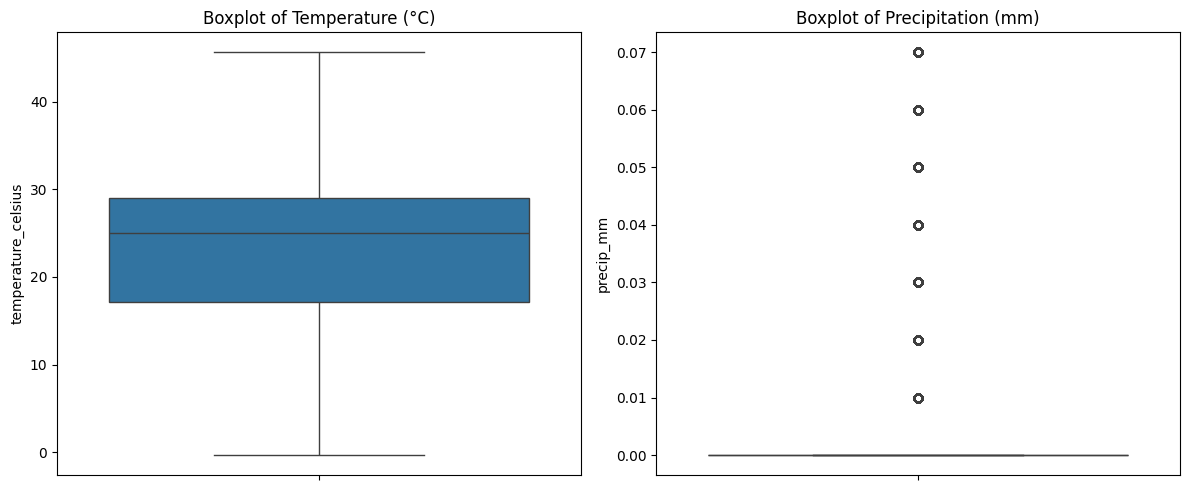

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_cleaned['temperature_celsius'], ax=axes[0])
axes[0].set_title('Boxplot of Temperature (°C)')

sns.boxplot(y=df_cleaned['precip_mm'], ax=axes[1])
axes[1].set_title('Boxplot of Precipitation (mm)')

plt.tight_layout()
plt.show()

By above box plot visualization , I can observe that precipitation has lots of outliers , to deal with this , I need to to use CAPPING method!

In [14]:
# Define the upper limit using the 95th percentile
upper_limit = df_cleaned['precip_mm'].quantile(0.95)

# Cap precipitation values above the upper limit
df_cleaned['precip_mm'] = np.where(df_cleaned['precip_mm'] > upper_limit, upper_limit, df_cleaned['precip_mm'])

print("Outliers in 'precip_mm' have been capped at the 95th percentile.")


Outliers in 'precip_mm' have been capped at the 95th percentile.


<ipython-input-14-b016c662ac74>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['precip_mm'] = np.where(df_cleaned['precip_mm'] > upper_limit, upper_limit, df_cleaned['precip_mm'])


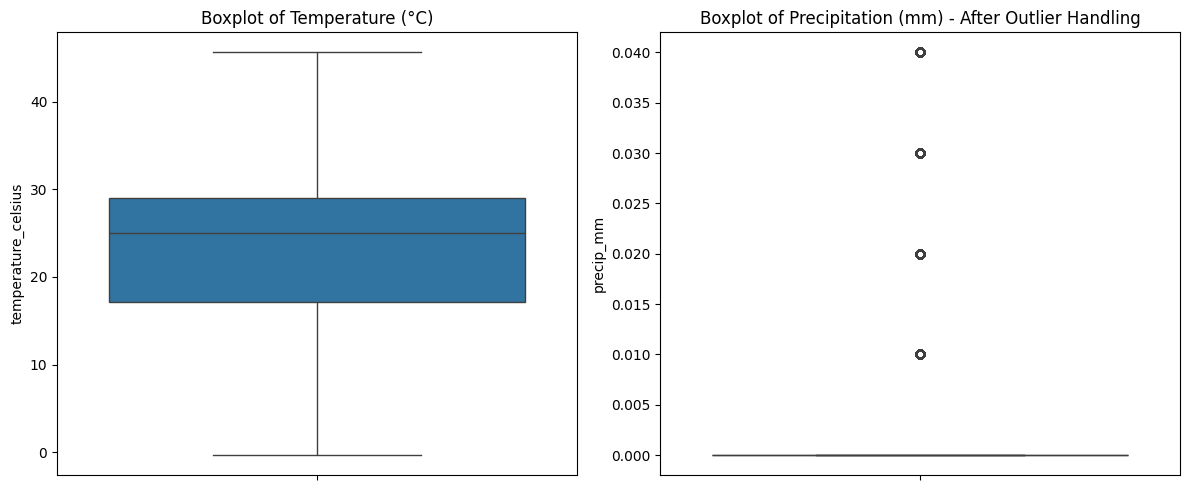

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.boxplot(y=df_cleaned['temperature_celsius'], ax=axes[0])
axes[0].set_title('Boxplot of Temperature (°C)')

sns.boxplot(y=df_cleaned['precip_mm'], ax=axes[1])
axes[1].set_title('Boxplot of Precipitation (mm) - After Outlier Handling')

plt.tight_layout()
plt.show()

# Time Series Visualization

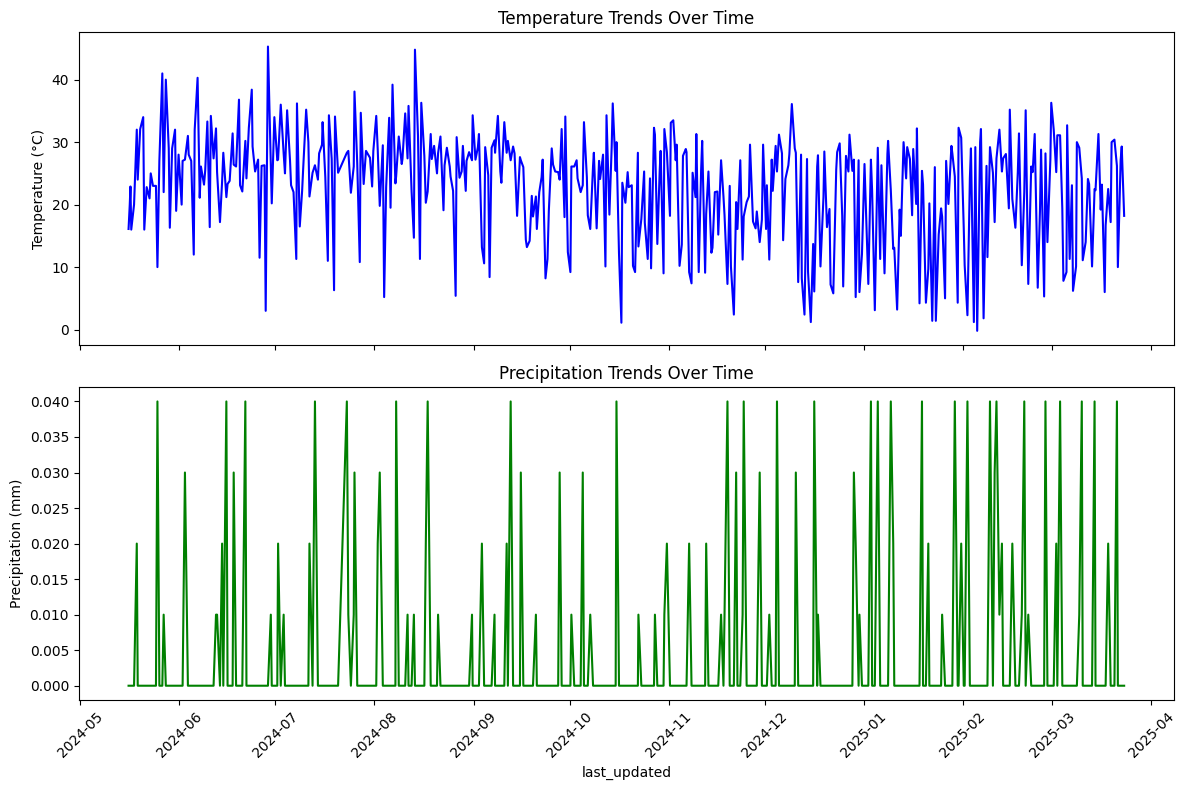

In [16]:
# Sort data by date
df_cleaned = df_cleaned.sort_values(by='last_updated')

# Sample data for better visualization
df_sampled = df_cleaned.iloc[::100, :]

fig, axes = plt.subplots(2, 1, figsize=(12, 8), sharex=True)

sns.lineplot(data=df_sampled, x='last_updated', y='temperature_celsius', ax=axes[0], color='blue')
axes[0].set_title('Temperature Trends Over Time')
axes[0].set_ylabel('Temperature (°C)')

sns.lineplot(data=df_sampled, x='last_updated', y='precip_mm', ax=axes[1], color='green')
axes[1].set_title('Precipitation Trends Over Time')
axes[1].set_ylabel('Precipitation (mm)')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
import numpy as np
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

# Convert 'last_updated' to datetime and set as index
df_cleaned['last_updated'] = pd.to_datetime(df_cleaned['last_updated'])
df_cleaned.set_index('last_updated', inplace=True)

# Resample temperature data to daily averages
temperature_series = df_cleaned['temperature_celsius'].resample('D').mean().dropna()

# Train-Test Split (80% Train, 20% Test)
split_index = int(len(temperature_series) * 0.8)
train, test = temperature_series[:split_index], temperature_series[split_index:]

print("Training data shape:", train.shape)
print("Testing data shape:", test.shape)

Training data shape: (248,)
Testing data shape: (63,)


# Building & Training the Forecasting Model

In [18]:
# Apply Exponential Smoothing Model
model = ExponentialSmoothing(train, trend="add", seasonal="add", seasonal_periods=7)
fitted_model = model.fit()

# Forecast for the test period
predictions = fitted_model.forecast(len(test))

# Evaluate model performance
mae = mean_absolute_error(test, predictions)
rmse = np.sqrt(mean_squared_error(test, predictions))

print(f"Model Evaluation: MAE = {mae:.2f}, RMSE = {rmse:.2f}")

Model Evaluation: MAE = 2.38, RMSE = 2.74


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


#  Forecast Visualization

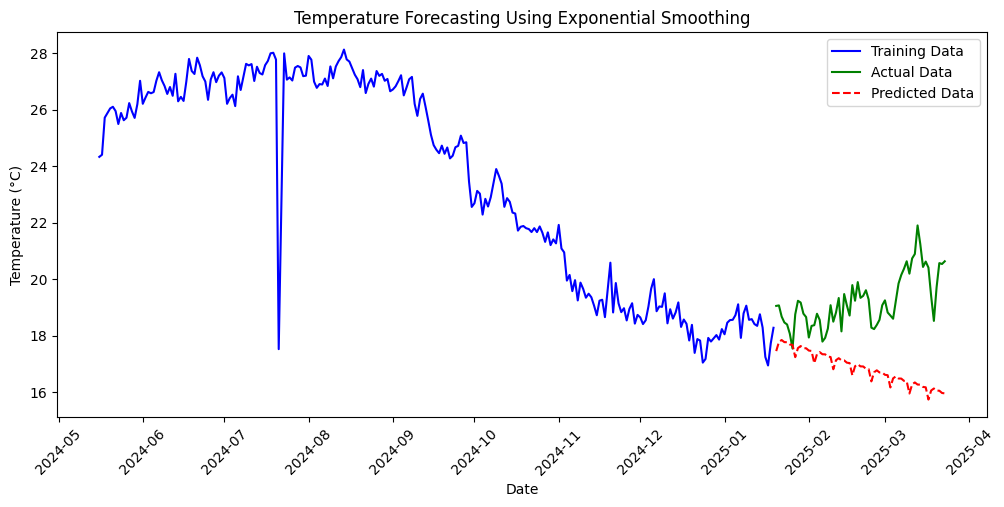

In [19]:
plt.figure(figsize=(12, 5))
plt.plot(train.index, train, label="Training Data", color='blue')
plt.plot(test.index, test, label="Actual Data", color='green')
plt.plot(test.index, predictions, label="Predicted Data", color='red', linestyle='dashed')

plt.xlabel("Date")
plt.ylabel("Temperature (°C)")
plt.title("Temperature Forecasting Using Exponential Smoothing")
plt.legend()
plt.xticks(rotation=45)
plt.show()